In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import os

In [11]:
# plot_path = "../Plot/1-dim-NORL-MFD-NT/comparison/"
# if not os.path.exists(plot_path):
#     os.makedirs(plot_path)
# base_path = "../results_2/Simulation_MFD_normal/NT/A_" 
# gamma  = 1
# parameter_ls = [0, 1, 2, 3, 3.8, 4, 5, 7, "change_5_3", "change_3_5"]

plot_path = "../Plot/1-dim-NORL-MFD-NT/A_std_0_2/comparison/"
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
base_path = "../results_NORL_pt_60_changed_ratio/A_" 
gamma  = 1
parameter_ls = [
                # 0,
                # 1, 
                # 2, 
                # 3, 3.8, 4, 5, 
                # 7,      
                # "change_7_3",
                # "change_3_7", 
                # "change_2_4",
                # "change_4_2", 
                # "random",
                 "std_0_2"
                 ]

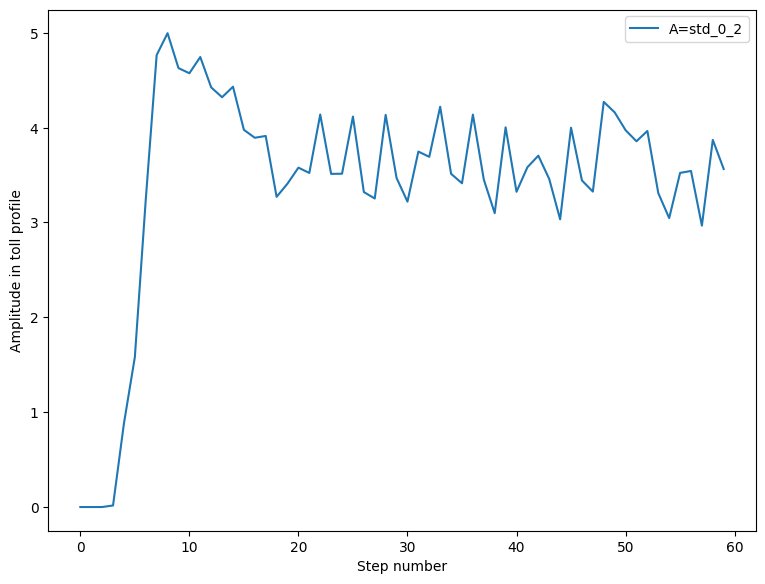

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Amplitude in toll profile", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(30, 60)
for model_parameter in parameter_ls: 
    action_arr_0 = np.load(file=(base_path+str(model_parameter)+"/action.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(action_arr_0[0], label = label_text)
ax.legend()
fig.savefig(plot_path+'/rw_eps.jpeg', dpi=fig.dpi)

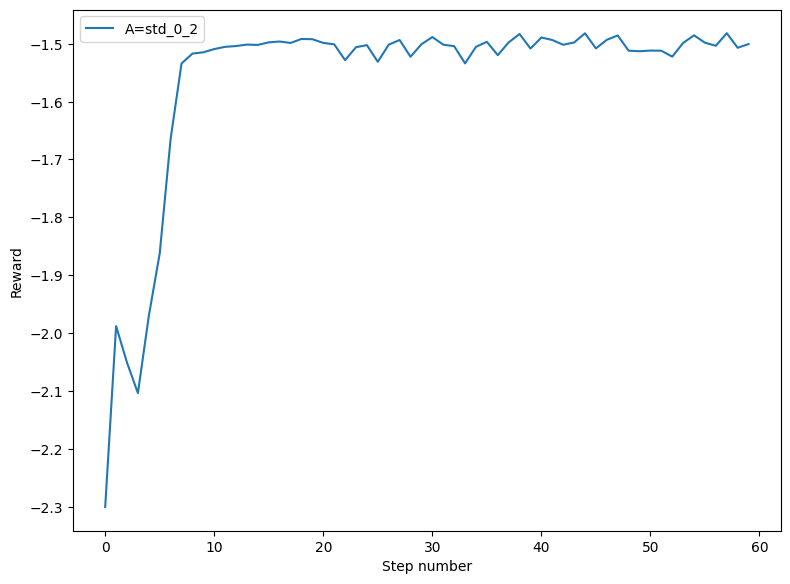

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Reward", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(30, 60)
for model_parameter in parameter_ls: 
    rw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/rw.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(rw_arr_0[0], label = label_text)
ax.legend()
fig.savefig(plot_path+'/rw_eps.jpeg', dpi=fig.dpi)

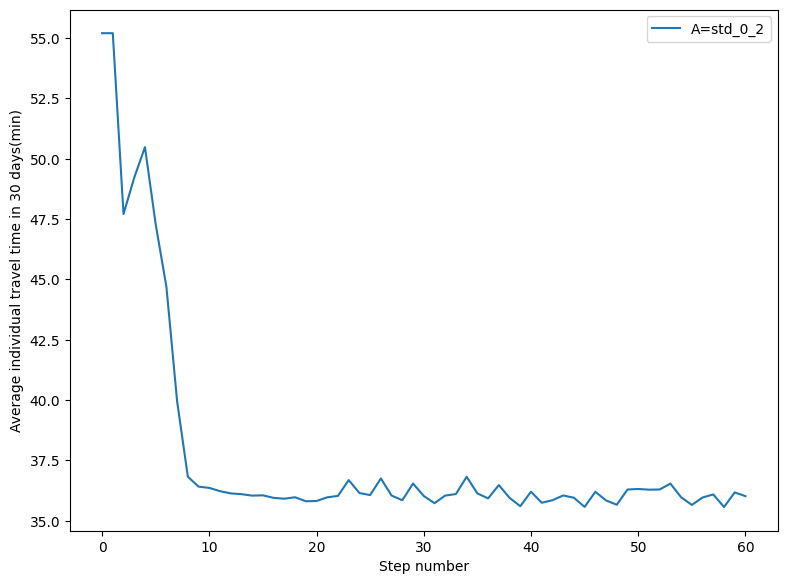

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Average individual travel time in 30 days(min)", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(30, 35)
for model_parameter in parameter_ls: 
    tt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/tt.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(tt_arr_0[0], label = label_text)
ax.legend()
fig.savefig(plot_path+'/AITT_eps.jpeg', dpi=fig.dpi)

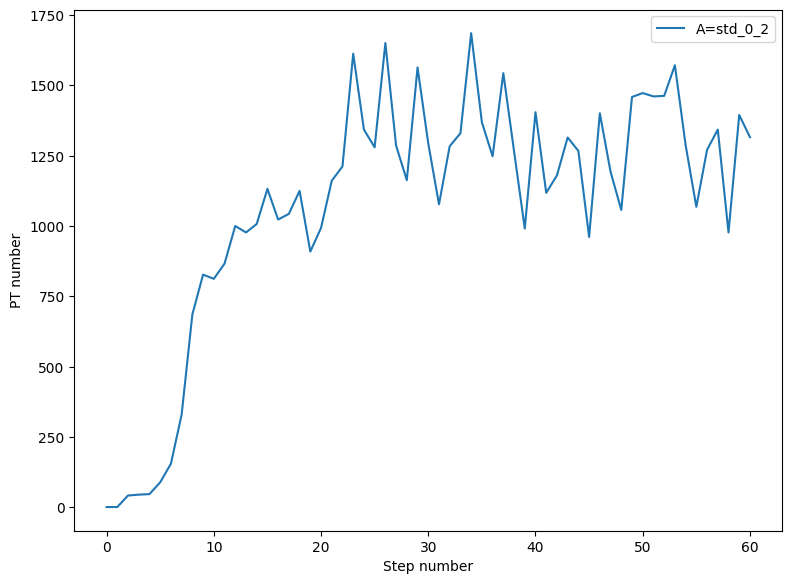

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("PT number", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(0, 7500)
for model_parameter in parameter_ls: 
    pt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/pt.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(pt_arr_0[0], label = label_text)
ax.legend()
fig.savefig(plot_path+'/PT_last_ep.jpeg', dpi=fig.dpi)

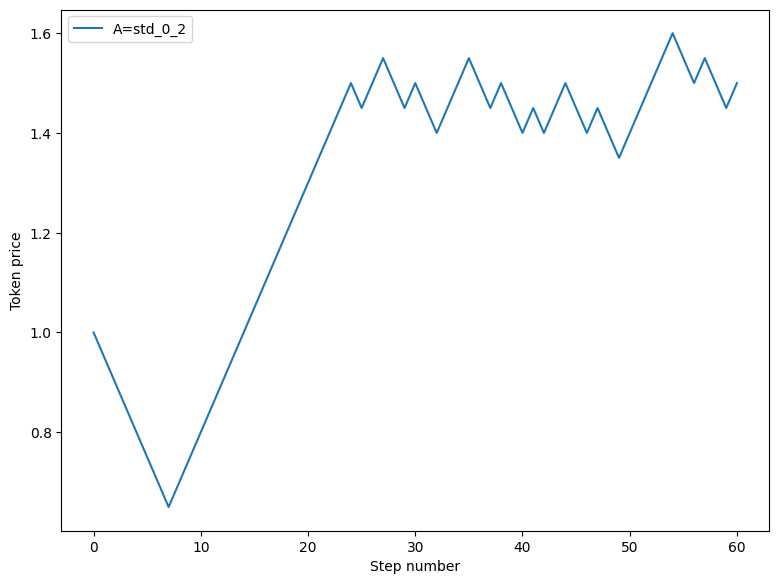

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Token price", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(0, 2.5)
for model_parameter in parameter_ls: 
    price_arr_0 = np.load(file=(base_path+str(model_parameter)+"/mp.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(price_arr_0[-1], label = label_text)

ax.legend()
fig.savefig(plot_path+'/mp_last_ep.jpeg', dpi=fig.dpi)

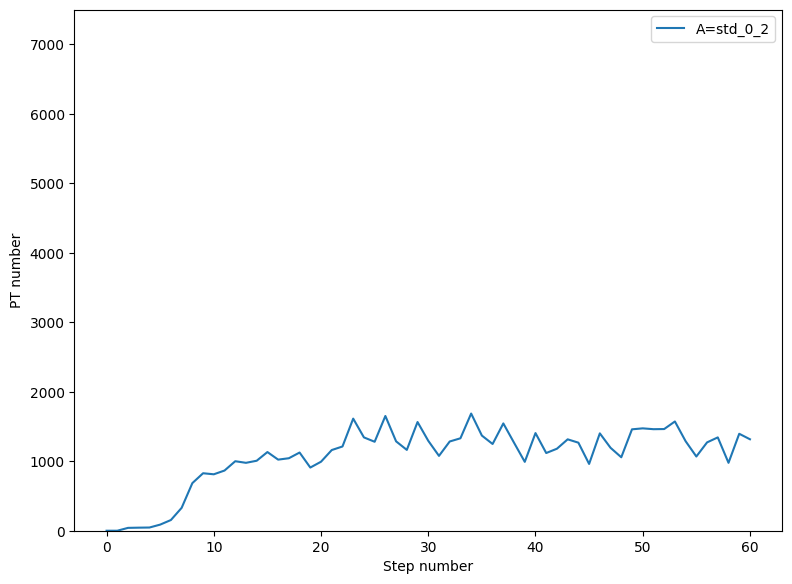

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("PT number", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
plt.ylim(0, 7500)
for model_parameter in parameter_ls: 
    pt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/pt.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(pt_arr_0[-1], label = label_text)

ax.legend()
fig.savefig(plot_path+'/PT_last_ep.jpeg', dpi=fig.dpi)

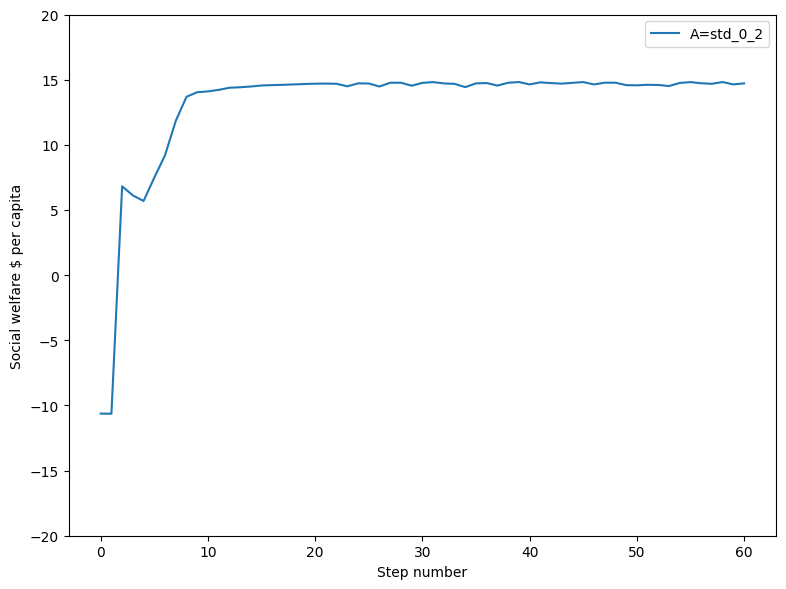

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
plt.ylim(-20, 20)

for model_parameter in parameter_ls: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(sw_arr_0[-1]/7500, label = label_text)

ax.legend()
fig.savefig(plot_path+'/sw_last_ep.jpeg', dpi=fig.dpi)

In [23]:
def bimodal_plot( x, A, mu, sigma):
    toll_profile  = A*np.exp(-(x-mu)**2/2/(sigma)**2)
    return toll_profile


def plot_flow_and_toll(iteration_index, 
                       toll_arr, 
                       tt_array, 
                       flow_array,
                       tt_last_5_day_arr_0,
                       pt_arr_0): 
    simulation_day = 30
    nrows = 5
    count = 0 
    # todo finish
    ncols= int(simulation_day/nrows)
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (60, 40)) 
    for row in range(nrows):
        for col in range(ncols): 
            current_day=count
            toll_1 = toll_arr[0][current_day]
            # print(" toll_1 ", toll_1 )
            tollparameters = np.array([toll_1[0], toll_1[1], toll_1[2]])
            timeofday = np.arange(12*60) # the toll fees of the day
            toll_profile_1 = np.round(np.repeat(np.maximum(bimodal_plot(timeofday[np.arange(0, 12*60, 1)], *tollparameters),0),1), 2)
            # label_context_1 = 'mu: '+str(int(toll_1[2]))+ ',sigma: '+ str(int(toll_1[1]))+ ',A: '+ str(round(toll_1[0],2))
            label_context_1 = ' A: '+ str(round(toll_1[0],2))

            axs[row, col].plot(np.arange(0,720), toll_profile_1[np.arange(0,720)], color='red', label = label_context_1)
            axs[row, col].legend(loc= 'upper right', fontsize= 30)
            axs[row, col].set_ylim(0,8)
            axs[row, col].tick_params(labelsize=20)


            ax_2 =  axs[row, col].twinx()
            prob = np.histogram(flow_array[0][current_day][:, 0], bins =144, range = (0, 720))[0]
            label_flow = "flow \n"+"AITT: "+str(np.round(tt_array[0][current_day], 2)) +"\n"+"Car only: "+str(np.round(tt_last_5_day_arr_0[current_day], 2))+"\n"+"PT: "+str(np.round(pt_arr_0[0][current_day], 2))
            ax_2.plot(np.arange(0,720, 5), prob, color='black', label = label_flow)
            ax_2.set_ylim(0,350)
            ax_2.tick_params(labelsize=20)

            #axs[row, col].legend()
            ax_2.legend(fontsize = 30, loc="upper left")
            count = count+1
            
    plt.tight_layout()
    fig_name = plot_path+"/toll_and_flow_"+str(iteration_index)+".png"
    plt.savefig(fig_name)

In [30]:
model_parameter = "std_0_2"
flow_arr_0 = np.load(file=(base_path+str(model_parameter)+"/flow.npy"))
toll_arr_0 = np.load(file=(base_path+str(model_parameter)+"/toll.npy"))
tt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/tt.npy"))
pt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/pt.npy"))
tt_last_5_day_arr_0 = np.load(file=(base_path+str(model_parameter)+"/AITT_daily_ls.npy"))
tt_car_only_last_5_day_arr_0 = np.load(file=(base_path+str(model_parameter)+"/AITT_car_only_ls.npy"))
tt_mean_0 = np.mean(tt_arr_0, axis=1)

 toll_1  [  0.   443.05  53.18]
 toll_1  [  0.        443.053668   63.1822232]
 toll_1  [  0.        443.053668   63.1822232]
 toll_1  [  0.        443.053668   63.1822232]
 toll_1  [1.64416000e-02 4.43053668e+02 6.31822232e+01]
 toll_1  [  0.88130094 443.053668    63.1822232 ]
 toll_1  [  1.58032908 443.053668    63.1822232 ]
 toll_1  [  3.23911954 443.053668    63.1822232 ]
 toll_1  [  4.76427437 443.053668    63.1822232 ]
 toll_1  [  4.99518684 443.053668    63.1822232 ]
 toll_1  [  4.62725887 443.053668    63.1822232 ]
 toll_1  [  4.57308345 443.053668    63.1822232 ]
 toll_1  [  4.74408613 443.053668    63.1822232 ]
 toll_1  [  4.42384945 443.053668    63.1822232 ]
 toll_1  [  4.32003945 443.053668    63.1822232 ]
 toll_1  [  4.43098894 443.053668    63.1822232 ]
 toll_1  [  3.97646353 443.053668    63.1822232 ]
 toll_1  [  3.89271493 443.053668    63.1822232 ]
 toll_1  [  3.91184822 443.053668    63.1822232 ]
 toll_1  [  3.26999506 443.053668    63.1822232 ]
 toll_1  [  3.4093646

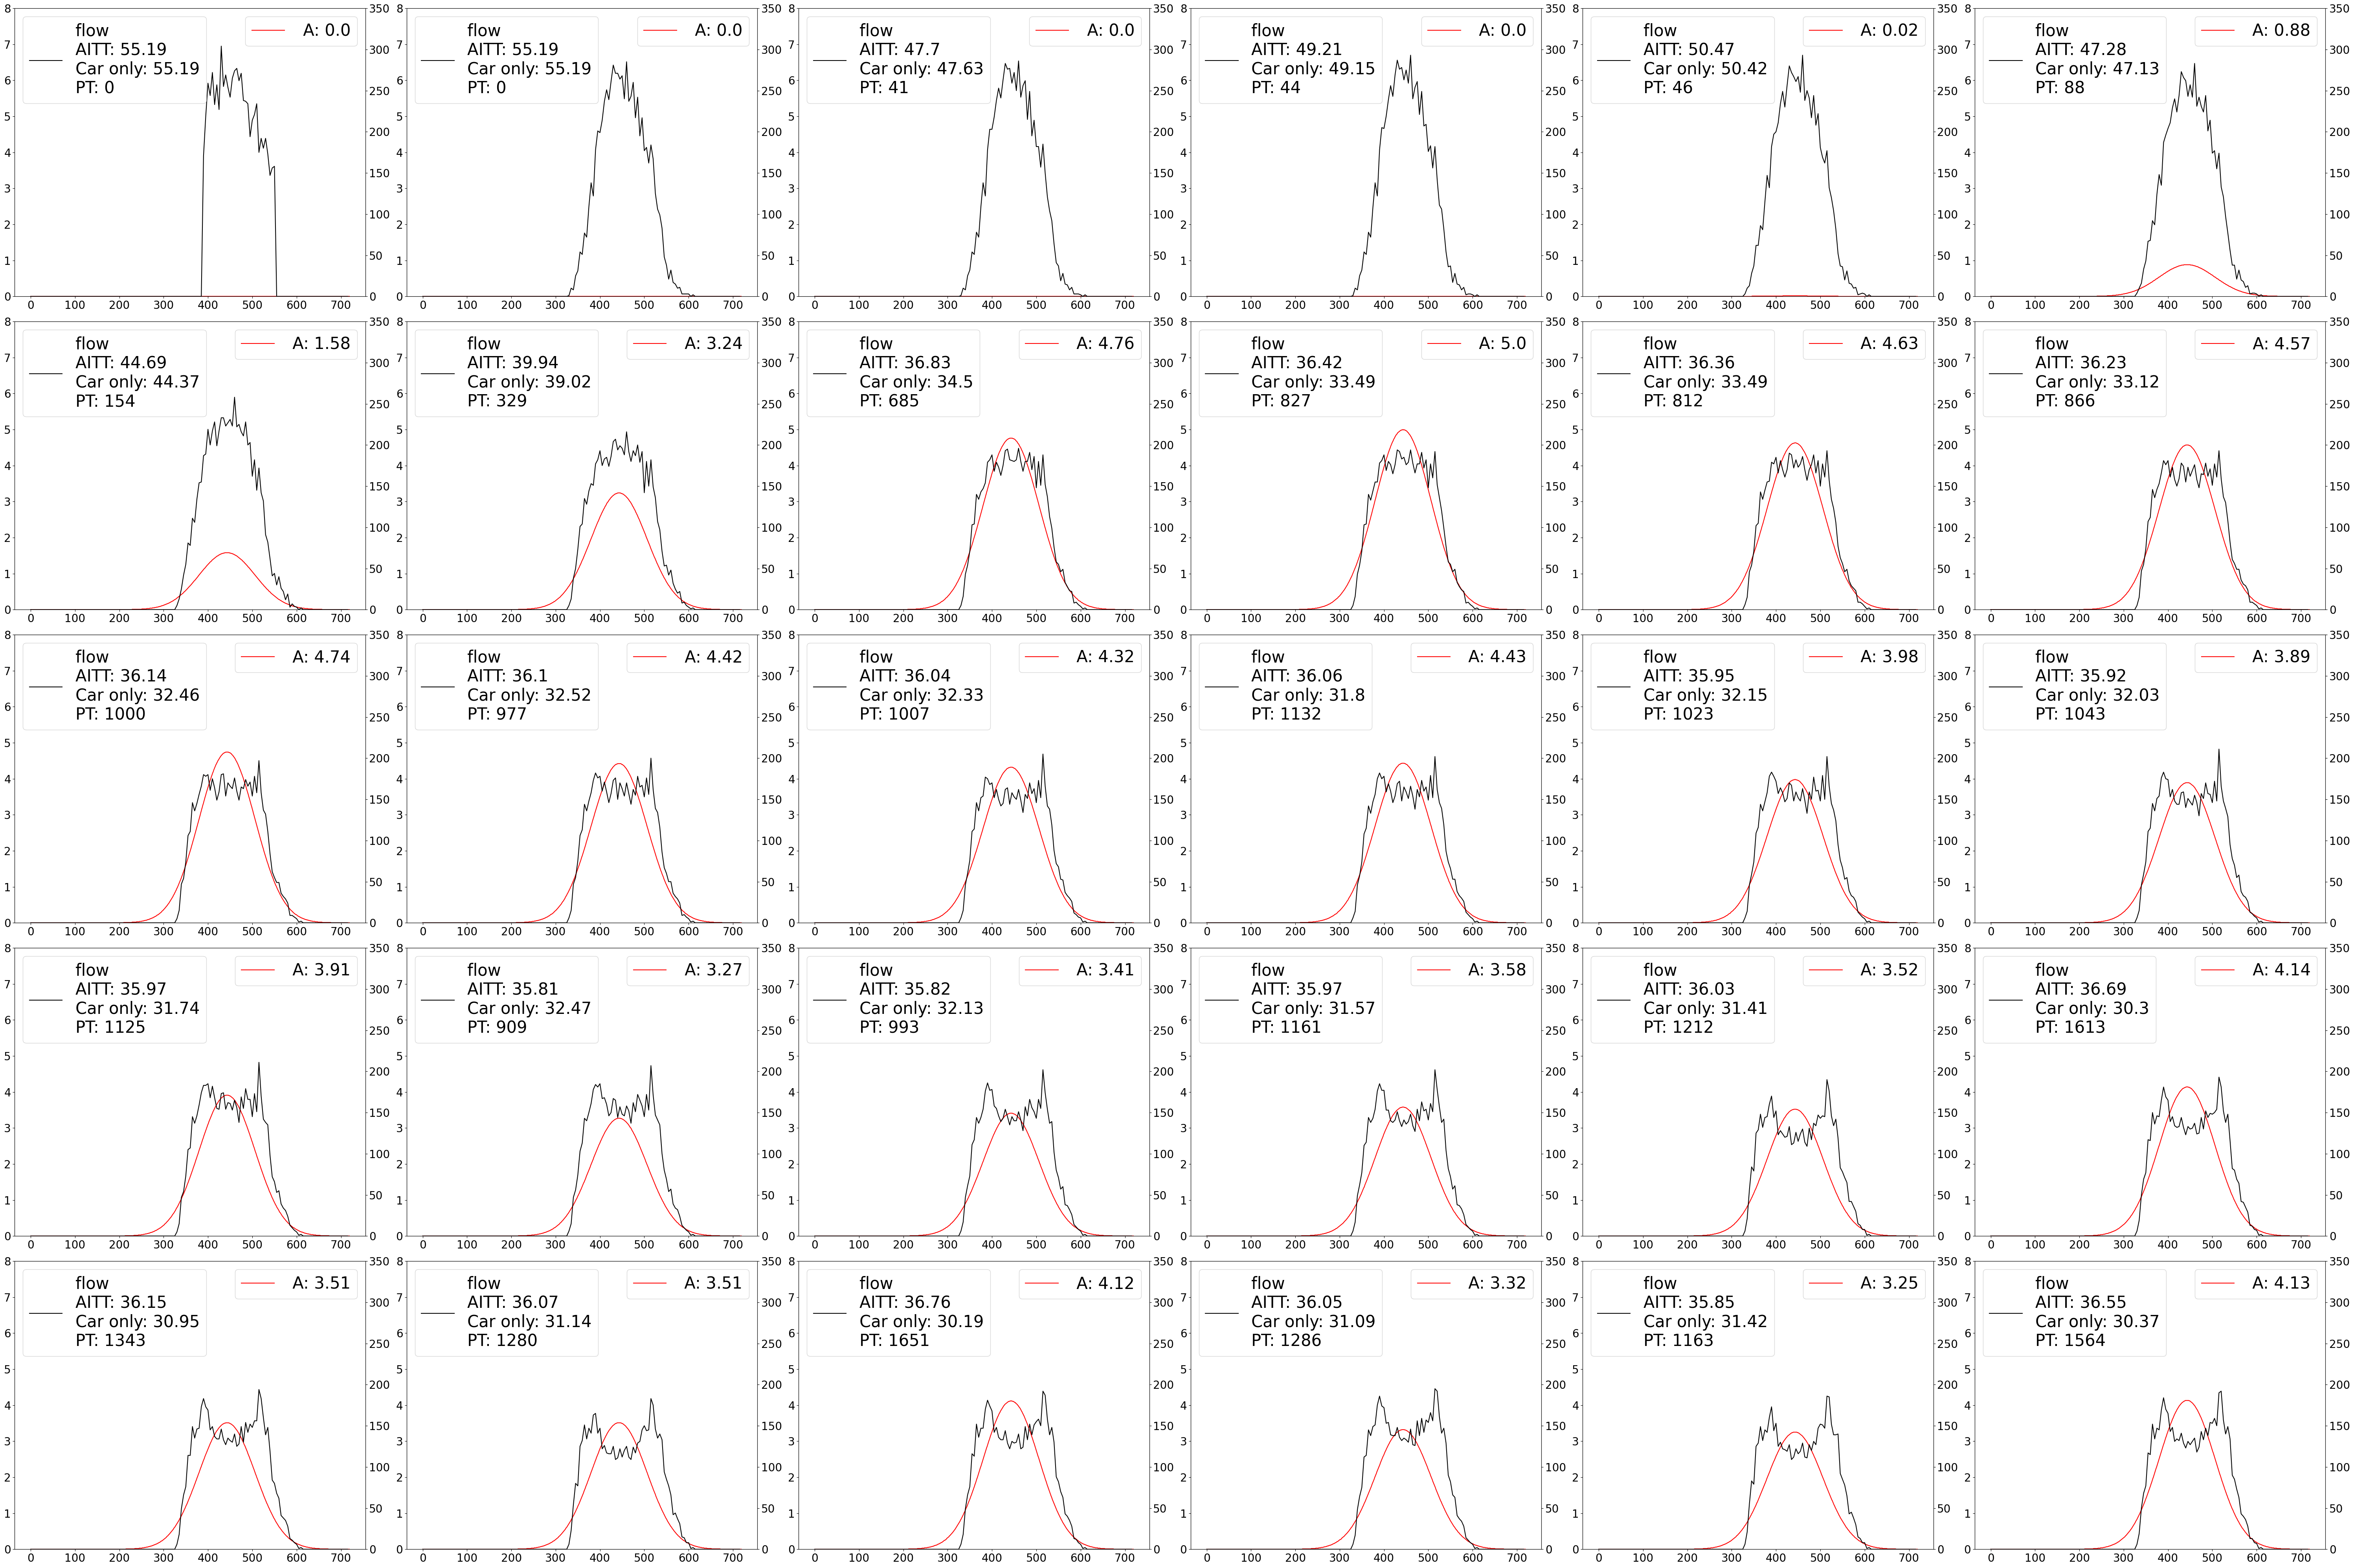

In [31]:
plot_flow_and_toll(1,  toll_arr_0, tt_arr_0, flow_arr_0, tt_car_only_last_5_day_arr_0, pt_arr_0)

FileNotFoundError: [Errno 2] No such file or directory: '../results_NORL_pt_60_changed_ratio/A_0/sw.npy'

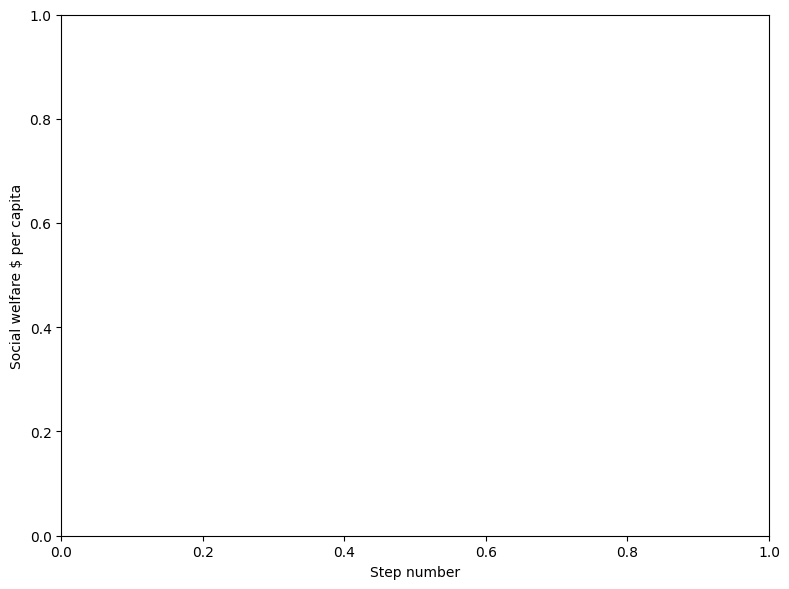

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(-20, 20)

for model_parameter in [0]: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    # sde_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sde_util_ls.npy"))
    # sdl_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sdl_util_ls.npy"))
    # userBuy_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userBuy_util_ls.npy"))
    # userSell_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"//userSell_util_ls.npy"))
    # ptwaiting_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"ptwaiting_util_ls.npy"))
    # I_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"I_util_ls.npy"))

    # tt_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"tt_util_ls.npy"))
    # label_text = "A="+ str(model_parameter)
    plt.plot(sw_arr_0[-1]/7500, label = "sw")
    # plt.plot(sde_util_arr_0/7500, label = "sde_util")
    # plt.plot(sdl_util_arr_0/7500, label = "sdl_util")
    # plt.plot(userBuy_util_arr_0/7500, label = "userBuy_util")
    # plt.plot(userSell_util_arr_0/7500, label = "userSell_util")
    # # plt.plot(I_util_arr_0/7500, label = "I_util")

    # plt.plot(ptwaiting_util_arr_0/7500, label = "ptwaiting_util")

ax.legend()
fig.savefig(plot_path+"/sw_"+str(model_parameter)+".jpeg", dpi=fig.dpi)

FileNotFoundError: [Errno 2] No such file or directory: '../results_NORL_pt_60_changed_ratio/A_0/sw.npy'

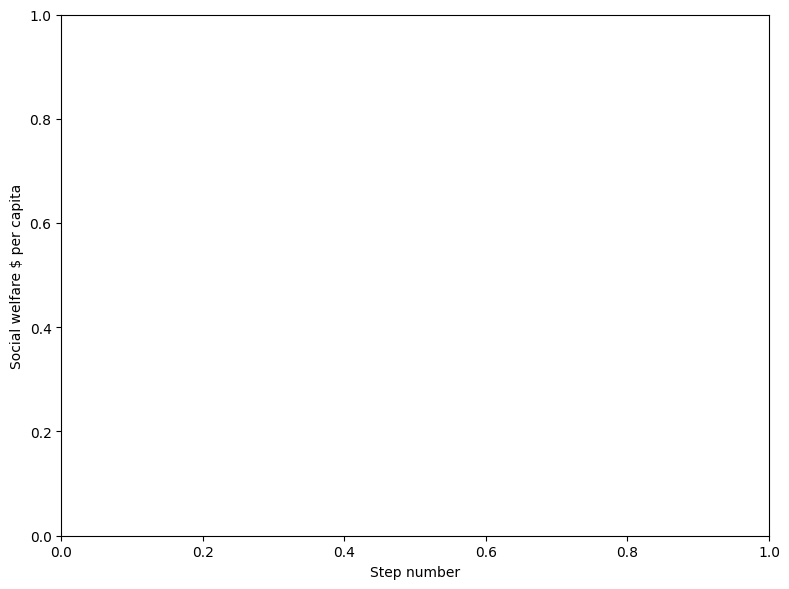

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(-20, 20)

for model_parameter in [0]: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    sde_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sde_util_ls.npy"))
    sdl_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sdl_util_ls.npy"))
    userBuy_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/userBuy_util_ls.npy"))
    userSell_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/userSell_util_ls.npy"))
    ptwaiting_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/ptwaiting_util_ls.npy"))
    I_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/I_util_ls.npy"))

    tt_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/tt_util_ls.npy"))
    label_text = "A="+ str(model_parameter)
    # plt.plot(sw_arr_0[-1]/7500, label = "sw")
    plt.plot(sde_util_arr_0/7500, label = "sde_util")
    plt.plot(sdl_util_arr_0/7500, label = "sdl_util")
    plt.plot(userBuy_util_arr_0/7500, label = "userBuy_util")
    plt.plot(userSell_util_arr_0/7500, label = "userSell_util")
    # plt.plot(I_util_arr_0/7500, label = "I_util")

    plt.plot(ptwaiting_util_arr_0/7500, label = "ptwaiting_util")

ax.legend()
fig.savefig(plot_path+"/sw_com_"+str(model_parameter)+".jpeg", dpi=fig.dpi)

In [ ]:
ptwaiting_util_arr_0

NameError: name 'ptwaiting_util_arr_0' is not defined

FileNotFoundError: [Errno 2] No such file or directory: '../results_NORL_pt_60_changed_ratio/A_7/sw.npy'

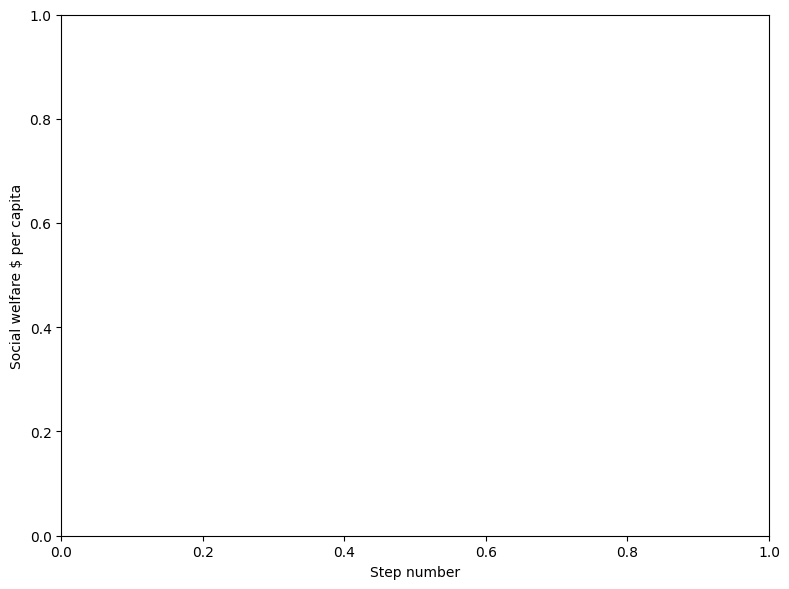

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(-20, 20)

for model_parameter in [7]: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    # sde_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sde_util_ls.npy"))
    # sdl_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sdl_util_ls.npy"))
    # userBuy_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userBuy_util_ls.npy"))
    # userSell_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userSell_util_ls.npy"))
    # ptwaiting_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/ptwaiting_util_ls.npy"))
    # I_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/I_util_ls.npy"))

    # tt_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/tt_util_ls.npy"))
    # label_text = "A="+ str(model_parameter)
    plt.plot(sw_arr_0[-1]/7500, label = "sw")
    # plt.plot(sde_util_arr_0/7500, label = "sde_util")
    # plt.plot(sdl_util_arr_0/7500, label = "sdl_util")
    # plt.plot(userBuy_util_arr_0/7500, label = "userBuy_util")
    # plt.plot(userSell_util_arr_0/7500, label = "userSell_util")
    # # plt.plot(I_util_arr_0/7500, label = "I_util")

    # plt.plot(ptwaiting_util_arr_0/7500, label = "ptwaiting_util")

ax.legend()
fig.savefig(plot_path+"/sw_"+str(model_parameter)+".jpeg", dpi=fig.dpi)

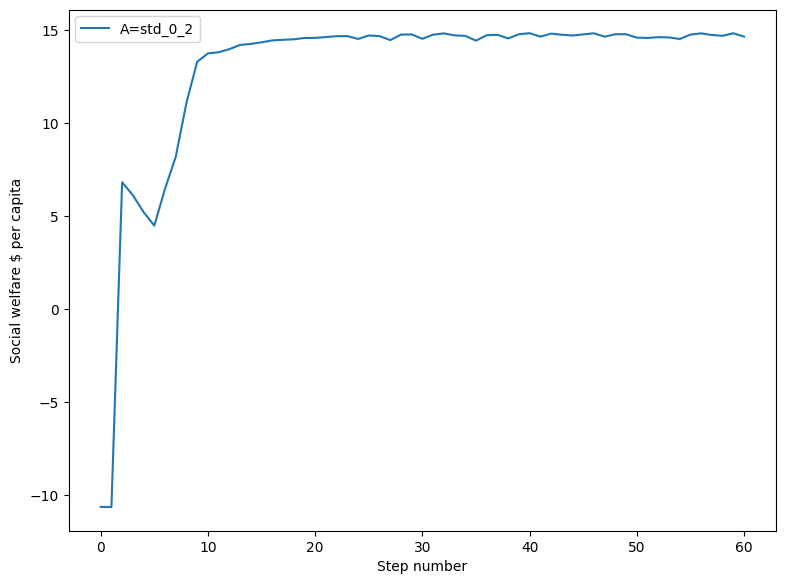

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(-20, 20)

for model_parameter in parameter_ls: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    # sde_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sde_util_ls.npy"))
    # sdl_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sdl_util_ls.npy"))
    # userBuy_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userBuy_util_ls.npy"))
    # userSell_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userSell_util_ls.npy"))
    # ptwaiting_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/ptwaiting_util_ls.npy"))
    # tt_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/tt_util_ls.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(sw_arr_0[-1]/7500, label = label_text)
    # plt.plot(sde_util_arr_0/7500, label = label_text)
    # plt.plot(sdl_util_arr_0/7500, label = label_text)
    # plt.plot(userBuy_util_arr_0/7500, label = label_text)
    # plt.plot(userSell_util_arr_0/7500, label = label_text)
    # plt.plot(ptwaiting_util_arr_0/7500, label = label_text)

ax.legend()
fig.savefig(plot_path+'/sw_last_ep.jpeg', dpi=fig.dpi)

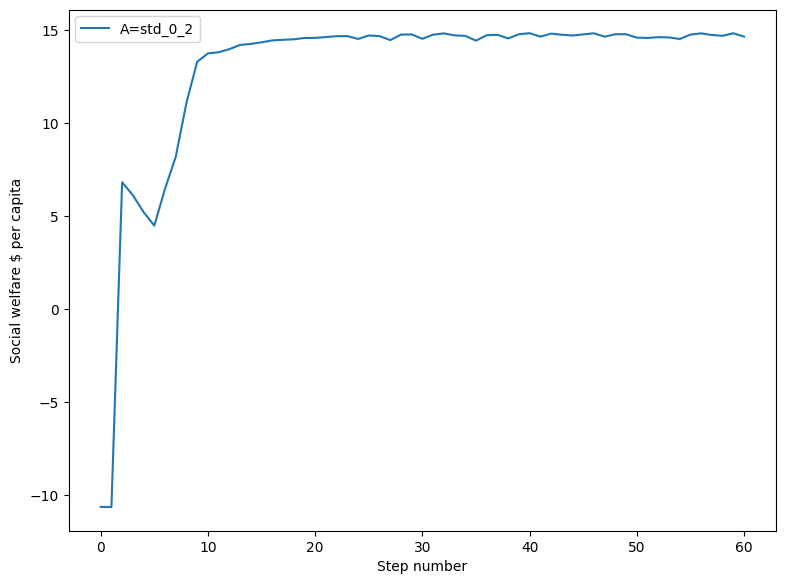

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel("Social welfare $ per capita", fontsize= 10)
plt.xlabel("Step number", fontsize= 10)
ax.tick_params(axis='x', labelsize= 10)
ax.tick_params(axis='y', labelsize= 10)
plt.tight_layout()
# plt.ylim(-20, 20)

for model_parameter in parameter_ls: 
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    # sde_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sde_util_ls.npy"))
    # sdl_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/sdl_util_ls.npy"))
    # userBuy_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userBuy_util_ls.npy"))
    # userSell_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/userSell_util_ls.npy"))
    # ptwaiting_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/ptwaiting_util_ls.npy"))
    # tt_util_arr_0 = np.load(file=(base_path+str(model_parameter)+"_ori/tt_util_ls.npy"))
    label_text = "A="+ str(model_parameter)
    plt.plot(sw_arr_0[-1]/7500, label = label_text)
    # plt.plot(sde_util_arr_0/7500, label = label_text)
    # plt.plot(sdl_util_arr_0/7500, label = label_text)
    # plt.plot(userBuy_util_arr_0/7500, label = label_text)
    # plt.plot(userSell_util_arr_0/7500, label = label_text)
    # plt.plot(ptwaiting_util_arr_0/7500, label = label_text)

ax.legend()
fig.savefig(plot_path+'/sw_last_ep.jpeg', dpi=fig.dpi)

In [4]:
data = []
constant_a = 1

output_dir = "../output/MFD_pt_60_changed_ratio/NT/" 
swvec = np.load(output_dir+"swvec.npy")
ptsharevec = np.load(output_dir+"ptsharevec.npy")
pricevec = np.load(output_dir+"pricevec.npy")
userSell_util_vec = np.load(output_dir+"userSell_util_vec.npy")
userBuy_util_vec = np.load(output_dir+"userBuy_util_vec.npy")

flowdf =  pd.read_csv(output_dir+"flowdf.csv")
a = flowdf.iloc[-7500*5:]
b = a[a["departure"]!=-1]


label_text =    "NT"
ls = [label_text, 
        np.round(np.mean(flowdf.iloc[:, 4]),2),
        np.round(np.mean(flowdf.iloc[-7500*5:, 4]),2),  
        np.round(np.round(np.mean(b["tt"])),2),  
        np.round(np.mean(swvec[-5:]/7500), 2),  
        np.round(np.mean(ptsharevec[-5:]), 2),  
        np.round(np.mean(pricevec[-5:]), 2),  

        ]

data.append(ls)

for model_parameter in parameter_ls: 
    tt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/tt.npy"))
    tt_last_5_day_arr_0 = np.load(file=(base_path+str(model_parameter)+"/tt_last_5_day.npy"))
    tt_mean_0 = np.mean(tt_arr_0, axis=1)
    rw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/rw.npy"))
    sw_arr_0 = np.load(file=(base_path+str(model_parameter)+"/sw.npy"))
    pt_arr_0 = np.load(file=(base_path+str(model_parameter)+"/pt.npy"))
    mp_array = np.load(file=(base_path+str(model_parameter)+"/mp.npy"))

    a = np.ones((30))
    a[-5:] *= constant_a
    gamma_arr = np.array([pow(gamma,i) for i in range(30)])
    rw_arr_1 = rw_arr_0[:, :30]*a/100
    return_arr_0 = np.sum(np.multiply(gamma_arr,rw_arr_0[:, :30]), axis=1)
    label_text = "A="+str(model_parameter)
    ls = [label_text, 
          np.round(np.mean(tt_mean_0[-5:]),2),
          np.round(np.mean(tt_last_5_day_arr_0),2),  
          np.round(np.mean(return_arr_0[-5:]),2),  
          np.round(np.mean(sw_arr_0[0, -5:]/7500), 2),  
          np.round(np.mean(pt_arr_0[0, -5:]), 2),  
          np.round(np.mean(mp_array[0, -5:]), 2),  

          ]
    data.append(ls)


col_names = ["A value", "mean of AITT(1 ep)",  "last-5-day AITT",  "last-5-day car only AITT","last-5-day sw", "last-5-day pt", "last-5-day price" ]

print(tabulate(data, headers=col_names))

A value      mean of AITT(1 ep)    last-5-day AITT    last-5-day car only AITT    last-5-day sw    last-5-day pt    last-5-day price
---------  --------------------  -----------------  --------------------------  ---------------  ---------------  ------------------
NT                        62.27              62.07                       62              266.61            817                   1
A=std_0_2                 37.75              35.96                      -48.59            14.71           1260.4                 1.5


In [22]:
pt_arr_0

array([[   0,    0,   41,   44,   46,   88,  154,  329,  685,  827,  812,
         866, 1000,  977, 1007, 1132, 1023, 1043, 1125,  909,  993, 1161,
        1212, 1613, 1343, 1280, 1651, 1286, 1163, 1564, 1294, 1077, 1284,
        1330, 1686, 1369, 1248, 1544, 1266,  991, 1405, 1118, 1180, 1315,
        1267,  961, 1401, 1193, 1057, 1459, 1473, 1461, 1463, 1572, 1288,
        1068, 1271, 1343,  977, 1395, 1316]])

In [7]:
pt_arr_0

array([[   0,    0,   41,   44,   46,   88,  154,  329,  685,  827,  812,
         866, 1000,  977, 1007, 1132, 1023, 1043, 1125,  909,  993, 1161,
        1212, 1613, 1343, 1280, 1651, 1286, 1163, 1564, 1294, 1077, 1284,
        1330, 1686, 1369, 1248, 1544, 1266,  991, 1405, 1118, 1180, 1315,
        1267,  961, 1401, 1193, 1057, 1459, 1473, 1461, 1463, 1572, 1288,
        1068, 1271, 1343,  977, 1395, 1316]])

In [ ]:
tt_last_5_day_arr_0

array([37.19275657])

In [ ]:
pt_arr_0[0, -5]

2225

In [ ]:
flowdf =  pd.read_csv(output_dir+"flowdf.csv")
a = flowdf.iloc[-7500*5:]
b = a[a["departure"]!=-1]
np.mean(b["tt"])

62.32254290816171

In [ ]:
tt_arr_0 = np.load(file=(base_path+"/ttvec.npy"))
tt_arr_0.shape

FileNotFoundError: [Errno 2] No such file or directory: '../results_NORL_pt_60_changed_ratio/A_/ttvec.npy'